# Titanic Case Study

# Variable Notes

- pclass: A proxy for socio-economic status (SES)
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...

- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
  Some children travelled only with a nanny, therefore parch=0 for them.

# Perform followings on dataset:
- Read the dataset and display top/bottom rows
- Get a summary of whole dataset
- Analyse the data and find out the columns which will not be part of further data analysis and provide the reason why?
- Drop those columns which needs to be dropped
- Find out the data type of each column
- Find out the number of entries in each column
- Find out which columns is having more number of missing values
- Replace missing values in each column and provide the reason for choosing one function to replace missing values
- Find out total number of Male/Female passengers
- Find out total number of passengers in each passenger class
- Find out total number of Survived/Not-survived passengers
- Find out total number of passengers of various age groups (0-30, 31-60 and >60)
- Find out which age group survived
- Find out total number of passengers city ((C = Cherbourg; Q = Queenstown; S = Southampton)) Vs PassengerClass

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### - Read the dataset and display top/bottom rows

In [18]:
df = pd.read_csv("titanic_dataset_modified.csv")

In [3]:
df.head(3)

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,$211.34,B5,S,2,NaN,"St Louis, MO"
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,$151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,$151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.tail(3)

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1306,1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,$7.23,NaN,C,NaN,304.0,NaN
1307,1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,$7.23,NaN,C,NaN,NaN,NaN
1308,1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,$7.88,NaN,S,NaN,NaN,NaN


### - Get a summary of whole dataset

In [5]:
df.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,body
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,121.000000
mean,654.000000,2.294882,0.381971,29.881135,0.498854,0.385027,160.809917
std,378.020061,0.837836,0.486055,14.413500,1.041658,0.865560,97.696922
min,0.000000,1.000000,0.000000,0.166700,0.000000,0.000000,1.000000
25%,327.000000,2.000000,0.000000,21.000000,0.000000,0.000000,72.000000
50%,654.000000,3.000000,0.000000,28.000000,0.000000,0.000000,155.000000
75%,981.000000,3.000000,1.000000,39.000000,1.000000,0.000000,256.000000
max,1308.000000,3.000000,1.000000,80.000000,8.000000,9.000000,328.000000


In [6]:
df.describe(include="all")

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308,295,1307,486,121.000000,745
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,263,186,3,27,NaN,369
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,$8.05,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,60,6,914,39,NaN,64
mean,654.000000,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,NaN,NaN,NaN,NaN,160.809917,NaN
std,378.020061,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,NaN,NaN,NaN,NaN,97.696922,NaN
min,0.000000,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,327.000000,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,72.000000,NaN
50%,654.000000,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,155.000000,NaN
75%,981.000000,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,256.000000,NaN


In [7]:
df.describe(include="all").loc["count"]

Unnamed: 0    1309
pclass        1309
survived      1309
name          1309
gender        1309
age           1046
sibsp         1309
parch         1309
ticket        1309
fare          1308
cabin          295
embarked      1307
boat           486
body           121
home.dest      745
Name: count, dtype: object

In [10]:
df.age.describe()["count"]

1046.0

#### - Analyse the data and find out the columns which will not be part of further data analysis and provide the reason why?

### - Drop those columns which needs to be dropped

In [11]:
df.head(2)

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,$211.34,B5,S,2,NaN,"St Louis, MO"
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,$151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [19]:
df.drop(["Unnamed: 0","name","ticket","cabin","boat","body","home.dest"],axis=1,inplace=True)

In [20]:
df.head(2)

,pclass,survived,gender,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,$211.34,S
1,1,1,male,0.9167,1,2,$151.55,S


### - Find out the data type of each column

In [21]:
df.dtypes

pclass        int64
survived      int64
gender       object
age         float64
sibsp         int64
parch         int64
fare         object
embarked     object
dtype: object

### - Find out the number of entries in each column

In [24]:
df.size

10472

In [23]:
df.age.size

1309

In [26]:
df.age.count()

1046

### - Find out which columns is having more number of missing values

In [43]:
df.age.isnull().sum()

263

In [41]:
df.isnull().sum()

pclass        0
survived      0
gender        0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [56]:
for k in df.keys():
    totalMissing = ((df[k].isnull().sum())/df.age.size)*100
#     print(totalMissing)
    print("totalMissing for %s is %f"%(k,totalMissing))

totalMissing for pclass is 0.000000
totalMissing for survived is 0.000000
totalMissing for gender is 0.000000
totalMissing for age is 20.091673
totalMissing for sibsp is 0.000000
totalMissing for parch is 0.000000
totalMissing for fare is 0.076394
totalMissing for embarked is 0.152788


### - Replace missing values in each column and provide the reason for choosing one function to replace missing values

In [58]:
df.describe(include="all")

,pclass,survived,gender,age,sibsp,parch,fare,embarked
count,1309.000000,1309.000000,1309,1046.000000,1309.000000,1309.000000,1308,1307
unique,NaN,NaN,2,NaN,NaN,NaN,263,3
top,NaN,NaN,male,NaN,NaN,NaN,$8.05,S
freq,NaN,NaN,843,NaN,NaN,NaN,60,914
mean,2.294882,0.381971,NaN,29.881135,0.498854,0.385027,NaN,NaN
std,0.837836,0.486055,NaN,14.413500,1.041658,0.865560,NaN,NaN
min,1.000000,0.000000,NaN,0.166700,0.000000,0.000000,NaN,NaN
25%,2.000000,0.000000,NaN,21.000000,0.000000,0.000000,NaN,NaN
50%,3.000000,0.000000,NaN,28.000000,0.000000,0.000000,NaN,NaN
75%,3.000000,1.000000,NaN,39.000000,1.000000,0.000000,NaN,NaN


In [59]:
df.head(2)

,pclass,survived,gender,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,$211.34,S
1,1,1,male,0.9167,1,2,$151.55,S


###### replacing missing age with mean

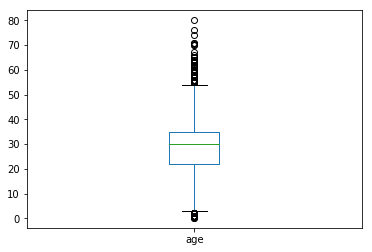

In [65]:
df.age.plot(kind="box")
plt.show()

In [66]:
df.age.mean()

29.881134512428055

In [67]:
df.age.median()

29.8811345124283

In [64]:
# df.age.fillna(df.age.mean()).count()
df.age.fillna(df.age.mean(),inplace = True)
# or 
# df.age = df.age.fillna(df.age.mean())
df.age.count()

1309

### replace missing embarked with mode

In [73]:
# df.embarked.mode()[0]
df.embarked.fillna(df.embarked.mode()[0],inplace=True)

In [75]:
df.embarked.isnull().sum()

0

### replace missing fare with mean

In [76]:
df.fare.dtype

dtype('O')

###### replace $ using regex

In [77]:
df.fare.head(5)

0    $211.34
1    $151.55
2    $151.55
3    $151.55
4    $151.55
Name: fare, dtype: object

In [81]:
df.fare = df.fare.replace({"\$":""},regex=True)
print(df.fare.head(3))
print(df.fare.dtype)

0    211.34
1    151.55
2    151.55
Name: fare, dtype: object
object


###### convert object type to float64 type

In [83]:
df.fare = df.fare.astype("float64")
df.fare.dtype

dtype('float64')

###### replace missing value in fare

In [86]:
df.fare.fillna(df.fare.mean(),inplace = True)

# describe

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
gender      1309 non-null object
age         1309 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1309 non-null float64
embarked    1309 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


###### - Find out total number of Male/Female passengers

In [88]:
df.gender.value_counts()

male      843
female    466
Name: gender, dtype: int64

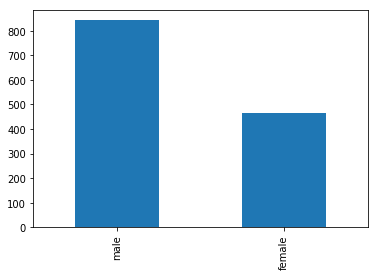

In [90]:
df.gender.value_counts().plot(kind="bar")
plt.show()

###### - Find out total number of passengers in each passenger class

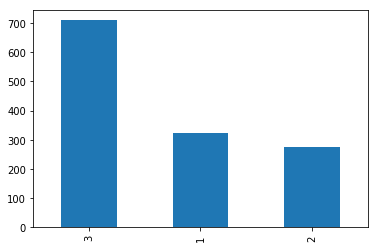

In [94]:
df.pclass.value_counts().plot(kind="bar")
plt.show()

###### - Find out total number of Survived/Not-survived passengers

###### - Find out total number of passengers of various age groups (0-30, 31-60 and >60)

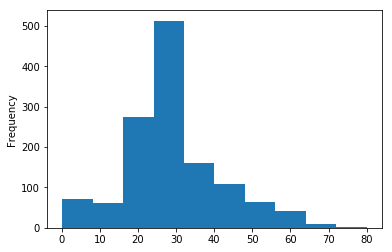

In [95]:
df.age.plot(kind="hist")
plt.show()

In [96]:
ag1 = df.age[df.age<=30]
ag2 = df.age[(df.age>30) & (df.age<=60) ]
ag3 = df.age[df.age>60]

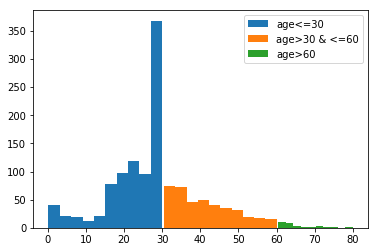

In [100]:
plt.hist(ag1,label="age<=30")
plt.hist(ag2,label="age>30 & <=60")
plt.hist(ag3,label="age>60")
plt.legend()
plt.show()

In [101]:
df["new_age"] = ag1

In [103]:
df.head(5)

,pclass,survived,gender,age,sibsp,parch,fare,embarked,new_age
0,1,1,female,29.0000,0,0,211.34,S,29.0000
1,1,1,male,0.9167,1,2,151.55,S,0.9167
2,1,0,female,2.0000,1,2,151.55,S,2.0000
3,1,0,male,30.0000,1,2,151.55,S,30.0000
4,1,0,female,25.0000,1,2,151.55,S,25.0000


# Grouping concept

In [104]:
grp1 = df.groupby(["gender","survived"])

In [106]:
grp1.groups

{('female',
  0): Int64Index([   2,    4,  105,  169,  286,  365,  369,  381,  382,  411,
             ...
             1227, 1230, 1231, 1265, 1267, 1273, 1276, 1279, 1304, 1305],
            dtype='int64', length=127),
 ('female',
  1): Int64Index([   0,    6,    8,   11,   12,   13,   17,   18,   21,   23,
             ...
             1223, 1244, 1247, 1257, 1258, 1260, 1261, 1286, 1290, 1300],
            dtype='int64', length=339),
 ('male',
  0): Int64Index([   3,    7,    9,   10,   15,   16,   19,   25,   30,   34,
             ...
             1296, 1297, 1298, 1299, 1301, 1302, 1303, 1306, 1307, 1308],
            dtype='int64', length=682),
 ('male',
  1): Int64Index([   1,    5,   14,   20,   22,   26,   29,   31,   37,   47,
             ...
             1196, 1228, 1232, 1233, 1236, 1238, 1240, 1254, 1256, 1277],
            dtype='int64', length=161)}

###### find out the counts

In [109]:
# grp1.get_group(('female',0))

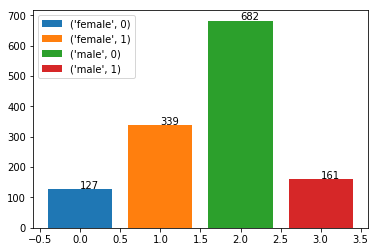

In [127]:
cnt = 0
for k in grp1.groups.keys():
    #print(k,grp1.get_group(k).age.size)
    plt.bar(cnt,grp1.get_group(k).age.size,label = k)
    plt.text(cnt,grp1.get_group(k).age.size+2,grp1.get_group(k).age.size)
    cnt +=1
plt.legend()
plt.show()


###### Find out city count

In [133]:
grp1.get_group(('female',0))["embarked"].value_counts()

S    93
Q    23
C    11
Name: embarked, dtype: int64

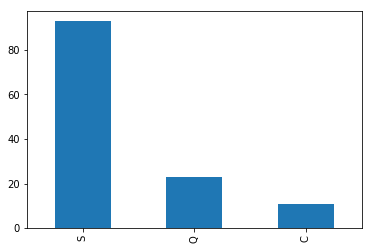

In [132]:
grp1.get_group(('female',0))["embarked"].value_counts().plot(kind="bar")
plt.show()

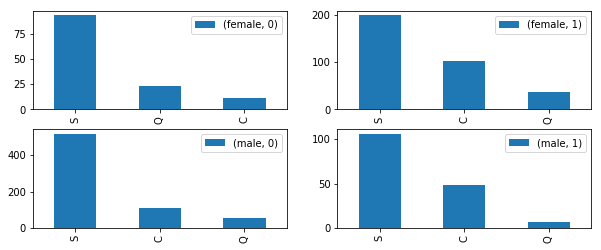

In [149]:
plt.figure(figsize=(10,4))
cnt = 1
for k in grp1.groups.keys():
    #print(k)
    plt.subplot(2,2,cnt)
    grp1.get_group(k)["embarked"].value_counts().plot(kind="bar",label =k)
    cnt +=1
    plt.legend()
plt.show()

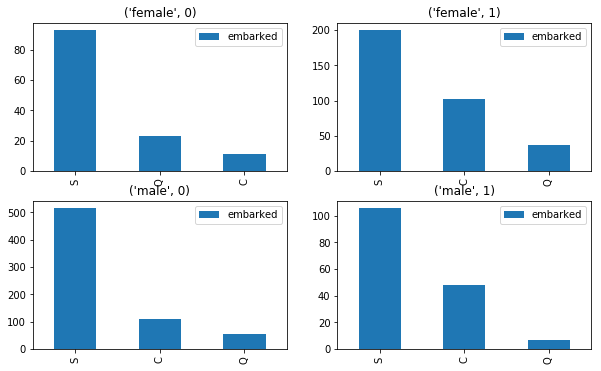

In [147]:
plt.figure(figsize=(10,6))
cnt = 1
for k in grp1.groups.keys():
    #print(k)
    plt.subplot(2,2,cnt)
    grp1.get_group(k)["embarked"].value_counts().plot(kind="bar")
    plt.title(k)
    cnt +=1
    plt.legend()
plt.show()

###### - Find out which age group survived

###### - Find out total number of passengers city ((C = Cherbourg; Q = Queenstown; S = Southampton)) Vs PassengerClass

# dump clean data to a file .csv,html,

In [150]:
df.head(2)

,pclass,survived,gender,age,sibsp,parch,fare,embarked,new_age
0,1,1,female,29.0000,0,0,211.34,S,29.0000
1,1,1,male,0.9167,1,2,151.55,S,0.9167


In [151]:
df.to_csv("cleaned_data.csv")

In [152]:
df.to_html("cleaned_data.html")

In [153]:
df.to_json("cleaned_data.json")

# join and merge

In [156]:
a = np.random.randint(1,5,9).reshape(3,3)
b = np.random.randint(1,5,9).reshape(3,3)
c = np.random.randint(1,5,9).reshape(3,3)
df1 = pd.DataFrame(a,columns=["A","B","C"])
df2 = pd.DataFrame(b,columns=["C","D","E"])
df3 = pd.DataFrame(c,columns=["D","E","F"])

In [157]:
df1

,A,B,C
0,1,3,1
1,1,4,2
2,3,4,1


In [158]:
df2

,C,D,E
0,3,4,2
1,2,2,1
2,4,1,4


In [159]:
df3

,D,E,F
0,4,3,2
1,1,2,2
2,3,4,1


In [161]:
df1.join(df2,on="A",lsuffix="_L")

,A,B,C_L,C,D,E
0,1,3,1,2.0,2.0,1.0
1,1,4,2,2.0,2.0,1.0
2,3,4,1,NaN,NaN,NaN


In [162]:
df1.join(df2,on="B",lsuffix="_L")

,A,B,C_L,C,D,E
0,1,3,1,NaN,NaN,NaN
1,1,4,2,NaN,NaN,NaN
2,3,4,1,NaN,NaN,NaN


In [165]:
df1.join(df2,on="C",lsuffix="_L",rsuffix="_R")

,A,B,C_L,C_R,D,E
0,1,3,1,2,2,1
1,1,4,2,4,1,4
2,3,4,1,2,2,1


In [166]:
df1.join(df2,on="C")

ValueError: columns overlap but no suffix specified: Index(['C'], dtype='object')

In [167]:
df1.join(df3,on="C")

,A,B,C,D,E,F
0,1,3,1,1,2,2
1,1,4,2,3,4,1
2,3,4,1,1,2,2


# merge

In [168]:
df1

,A,B,C
0,1,3,1
1,1,4,2
2,3,4,1


In [169]:
df2

,C,D,E
0,3,4,2
1,2,2,1
2,4,1,4


In [170]:
df1.merge(df2)# default is how=inner

,A,B,C,D,E
0,1,4,2,2,1


In [180]:
df1.merge(df2,on="C")

,A,B,C,D,E
0,1,4,2,2,1


In [175]:
df1.merge(df2,how="left")[["A","B","E"]]

,A,B,E
0,1,3,NaN
1,1,4,1.0
2,3,4,NaN


In [172]:
df1.merge(df2,how="right")

,A,B,C,D,E
0,1.0,4.0,2,2,1
1,NaN,NaN,3,4,2
2,NaN,NaN,4,1,4


In [173]:
df1.merge(df2,how="outer")

,A,B,C,D,E
0,1.0,3.0,1,NaN,NaN
1,3.0,4.0,1,NaN,NaN
2,1.0,4.0,2,2.0,1.0
3,NaN,NaN,3,4.0,2.0
4,NaN,NaN,4,1.0,4.0


In [174]:
df1.merge(df2,how="outer",indicator=True)

,A,B,C,D,E,_merge
0,1.0,3.0,1,NaN,NaN,left_only
1,3.0,4.0,1,NaN,NaN,left_only
2,1.0,4.0,2,2.0,1.0,both
3,NaN,NaN,3,4.0,2.0,right_only
4,NaN,NaN,4,1.0,4.0,right_only


# sort

In [184]:
a = np.random.randint(1,50,20).reshape(10,2)
df1 = pd.DataFrame(a,columns=["A","C"])

In [185]:
df1

,A,C
0,45,19
1,13,20
2,43,36
3,17,12
4,39,3
5,3,35
6,15,24
7,46,15
8,40,47
9,46,8


In [191]:
df1.sort_index(axis=1,ascending=False)

,C,A
0,19,45
1,20,13
2,36,43
3,12,17
4,3,39
5,35,3
6,24,15
7,15,46
8,47,40
9,8,46


In [192]:
df1.sort_index(axis=0,ascending=False)

,A,C
9,46,8
8,40,47
7,46,15
6,15,24
5,3,35
4,39,3
3,17,12
2,43,36
1,13,20
0,45,19


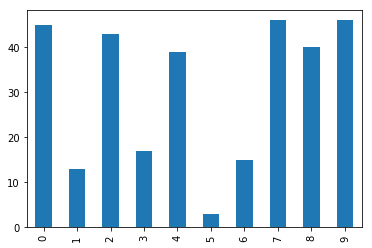

In [194]:
df1.A.plot(kind="bar")
plt.show()

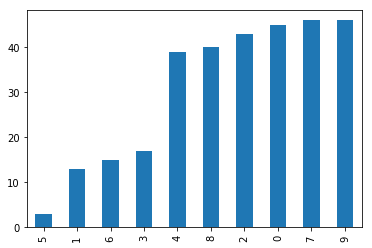

In [198]:
df1.sort_values(by="A").A.plot(kind="bar")
plt.show()

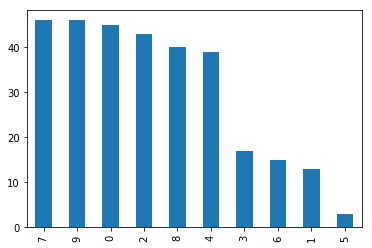

In [199]:
df1.sort_values(by="A",ascending=False).A.plot(kind="bar")
plt.show()